In [22]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [23]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_2022-11-07%2018%3A00%3A26.931451.json"

In [24]:
data = json.loads(requests.get(RESULT_URL).text)

In [25]:
data.keys()

dict_keys(['crows_pairs_bert_classifieronly', 'crows_pairs_bert_finetuned'])

In [26]:
checkpoints = list(data.keys())
suffix = "250"
suffixes = [suffix]

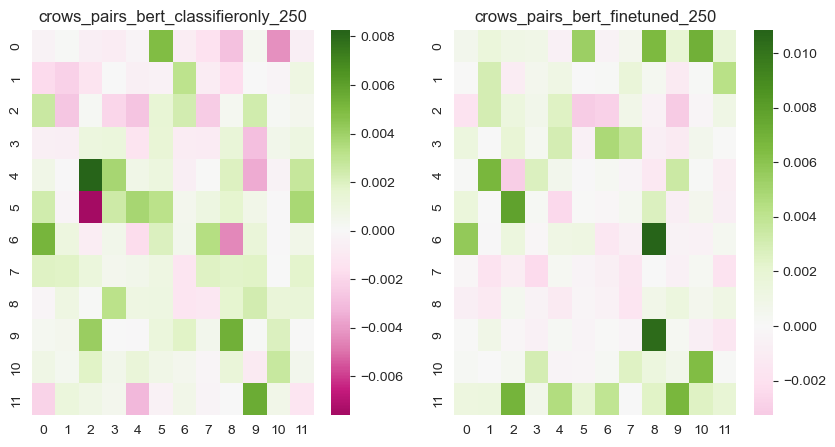

In [29]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    ax = fig.add_subplot(1, len(checkpoints),i+1)
    ax.set_title(f"{checkpoint}_{suffix}")
    sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

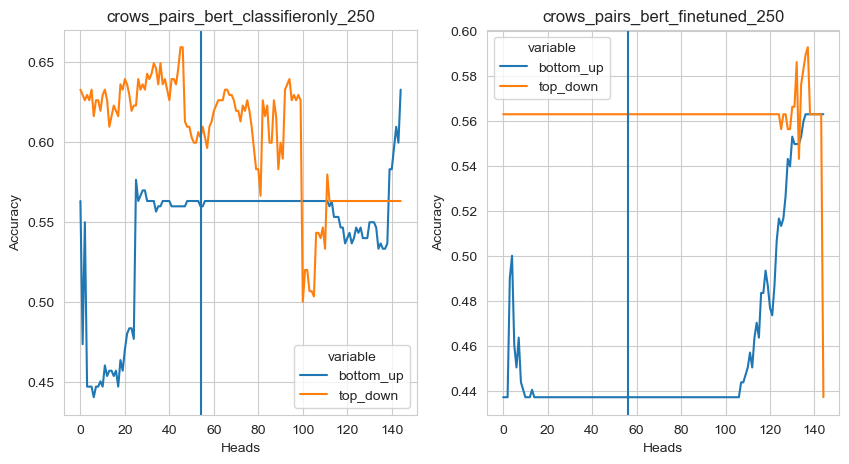

In [31]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(len(suffixes), len(checkpoints), len(checkpoints)*j+i+1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data[checkpoint][suffix]["bottom_up_results"],
            'top_down': data[checkpoint][suffix]["top_down_results"]
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)
plt.show()